In [1]:
import sys

import os
os.chdir("/scratch/smj5vup/CMIP6/omoCMIP")
sys.path.append('/scratch/smj5vup/CMIP6/omoCMIP/')
sys.path.append('/scratch/smj5vup/CMIP6/omoCMIP/esd/')
sys.path.append('/scratch/smj5vup/CMIP6/omoCMIP/esd/util/')
sys.path.append('/scratch/smj5vup/CMIP6/omoCMIP/esd/downscale/')

from esd.downscale.prcp import PrcpDownscale
from esd.downscale.tair import TairDownscale
from esd.util import Unbuffered, StatusCheck, mkdir_p
import esd
import glob
import itertools
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt


In [2]:
base_start_yr = str(esd.cfg.start_date_baseline.year)
base_end_yr = str(esd.cfg.end_date_baseline.year)
train_start_yr = str(esd.cfg.start_date_train_downscale.year)
train_end_yr = str(esd.cfg.end_date_train_downscale.year)
ds_start_yr = str(esd.cfg.start_date_downscale.year)
ds_end_yr = str(esd.cfg.end_date_downscale.year)

print(base_start_yr, base_end_yr, train_start_yr, train_end_yr, ds_start_yr, ds_end_yr)

1981 2018 1981 2018 2019 2099


In [3]:
# pip install netcdf4

In [4]:
# define downscale windows 
# downscale_wins =  [('1981','2018'), ('2019','2039'), ('2040','2069'), ('2070','2099')]

# # data that has been upsampled and then downsampled
# # from original resolution to 1 degree back to original 
# fpath_pr_obsc = os.path.join(esd.cfg.path_obs_resample,
#                                    'pr_CHIRPS05_1981_2019_p05deg_remapbic.nc')

# prcp_d = PrcpDownscale(esd.cfg.fpath_obs_pr, fpath_pr_obsc,
#                        base_start_yr, base_end_yr, train_start_yr, train_end_yr,
#                        ds_start_yr, ds_end_yr)

# downscalers = {'pr': prcp_d}


In [5]:
## cc1 is all null

files = os.listdir('/scratch/smj5vup/CMIP6/Debias/cmip6_debiased/resampled/pr/')


In [6]:
os.chdir('/scratch/smj5vup/CMIP6/Debias/cmip6_debiased/resampled/pr/')

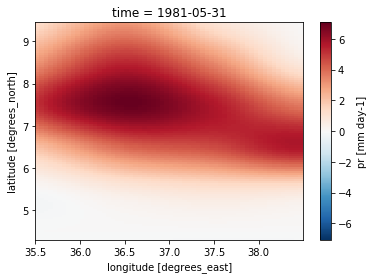

In [7]:
# fpath_cmip6 = files[0]
# ds = xr.open_dataset(fpath_cmip6, decode_cf=False)
# vname = list(ds.data_vars.keys())[0] # variable name
# ds[vname].attrs.pop('missing_value')
# ds = xr.decode_cf(ds)
# da = ds[vname].load()
# da.isel(time=150).plot()

pr.day.GFDL-ESM2G.rcp85.r1i1p1.19810101-20991231.historical_merged.nc
pr.day.MPI-ESM-LR.rcp26.r1i1p1.19810101-20991231.historical_merged.nc
pr.day.CMCC-CMS.rcp45.r1i1p1.19810101-20991231.historical_merged.nc
pr.day.CSIRO-Mk3-6-0.rcp85.r1i1p1.19810101-20991231.historical_merged.nc
pr.day.HadGEM2-CC.rcp45.r1i1p1.19810101-20991231.historical_merged.nc
pr.day.MIROC-ESM-CHEM.rcp45.r1i1p1.19810101-20991231.historical_merged.nc
pr.day.GFDL-CM3.rcp60.r1i1p1.19810101-20991231.historical_merged.nc
pr.day.CSIRO-Mk3-6-0.rcp26.r1i1p1.19810101-20991231.historical_merged.nc
pr.day.GFDL-ESM2G.rcp26.r1i1p1.19810101-20991231.historical_merged.nc
pr.day.MPI-ESM-LR.rcp85.r1i1p1.19810101-20991231.historical_merged.nc
pr.day.GFDL-CM3.rcp85.r1i1p1.19810101-20991231.historical_merged.nc
pr.day.NorESM1-M.rcp45.r1i1p1.19810101-20991231.historical_merged.nc
pr.day.CSIRO-Mk3-6-0.rcp60.r1i1p1.19810101-20991231.historical_merged.nc
pr.day.MIROC-ESM.rcp45.r1i1p1.19810101-20991231.historical_merged.nc
pr.day.CCSM4.rc

/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2019.10-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


pr.day.GFDL-CM3.rcp26.r1i1p1.19810101-20991231.historical_merged.nc


/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2019.10-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


pr.day.HadGEM2-ES.rcp45.r1i1p1.19810101-20991231.historical_merged.nc


/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2019.10-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


pr.day.CESM1-BGC.rcp85.r1i1p1.19810101-20991231.historical_merged.nc


/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2019.10-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


pr.day.MIROC-ESM-CHEM.rcp26.r1i1p1.19810101-20991231.historical_merged.nc


/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2019.10-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


pr.day.HadGEM2-ES.rcp60.r1i1p1.19810101-20991231.historical_merged.nc


/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2019.10-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


pr.day.CMCC-CESM.rcp85.r1i1p1.19810101-20991231.historical_merged.nc


/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2019.10-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


pr.day.MPI-ESM-LR.rcp45.r1i1p1.19810101-20991231.historical_merged.nc


/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2019.10-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


pr.day.GFDL-ESM2G.rcp45.r1i1p1.19810101-20991231.historical_merged.nc


/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2019.10-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


pr.day.CCSM4.rcp60.r1i1p1.19810101-20991231.historical_merged.nc


/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2019.10-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


pr.day.GFDL-ESM2M.rcp60.r1i1p1.19810101-20991231.historical_merged.nc


/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2019.10-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


pr.day.CMCC-CMS.rcp85.r1i1p1.19810101-20991231.historical_merged.nc
pr.day.NorESM1-M.rcp60.r1i1p1.19810101-20991231.historical_merged.nc


/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2019.10-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2019.10-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


pr.day.CSIRO-Mk3-6-0.rcp45.r1i1p1.19810101-20991231.historical_merged.nc


/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2019.10-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


pr.day.MIROC-ESM.rcp60.r1i1p1.19810101-20991231.historical_merged.nc


/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2019.10-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


pr.day.HadGEM2-CC.rcp85.r1i1p1.19810101-20991231.historical_merged.nc


/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2019.10-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


pr.day.MIROC-ESM-CHEM.rcp85.r1i1p1.19810101-20991231.historical_merged.nc


/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2019.10-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


pr.day.CNRM-CM5.rcp45.r1i1p1.19810101-20991231.historical_merged.nc


/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2019.10-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


pr.day.MPI-ESM-MR.rcp45.r1i1p1.19810101-20991231.historical_merged.nc


/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2019.10-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


pr.day.MIROC-ESM.rcp26.r1i1p1.19810101-20991231.historical_merged.nc


/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2019.10-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


pr.day.NorESM1-M.rcp26.r1i1p1.19810101-20991231.historical_merged.nc


/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2019.10-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


pr.day.GFDL-ESM2M.rcp26.r1i1p1.19810101-20991231.historical_merged.nc


/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2019.10-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


pr.day.CESM1-BGC.rcp45.r1i1p1.19810101-20991231.historical_merged.nc


/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2019.10-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


pr.day.GFDL-CM3.rcp45.r1i1p1.19810101-20991231.historical_merged.nc


/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2019.10-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


pr.day.MIROC-ESM-CHEM.rcp60.r1i1p1.19810101-20991231.historical_merged.nc


/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2019.10-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


pr.day.NorESM1-M.rcp85.r1i1p1.19810101-20991231.historical_merged.nc


/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2019.10-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


pr.day.MIROC-ESM.rcp85.r1i1p1.19810101-20991231.historical_merged.nc


/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2019.10-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


pr.day.CCSM4.rcp85.r1i1p1.19810101-20991231.historical_merged.nc


/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2019.10-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


pr.day.GFDL-ESM2M.rcp85.r1i1p1.19810101-20991231.historical_merged.nc


/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2019.10-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


pr.day.ACCESS1-0.rcp85.r1i1p1.19810101-20991231.historical_merged.nc


/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2019.10-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


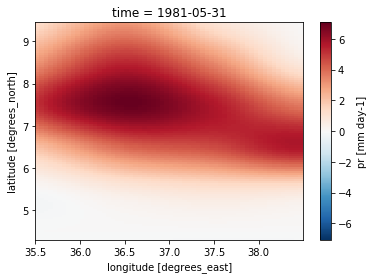

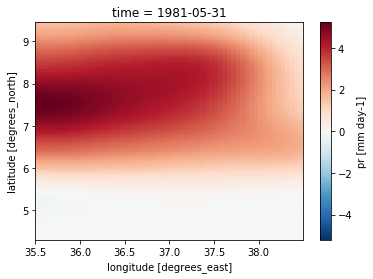

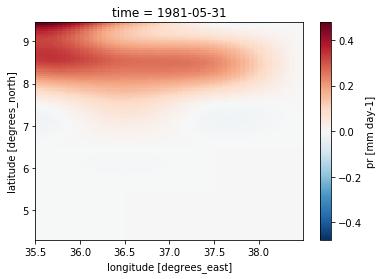

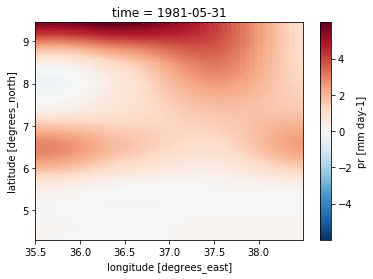

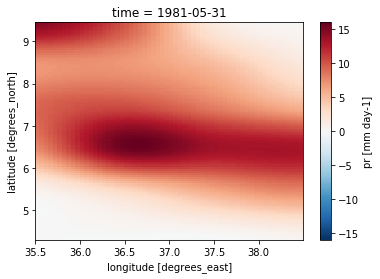

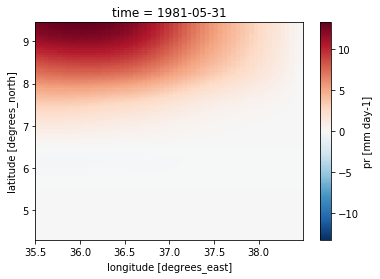

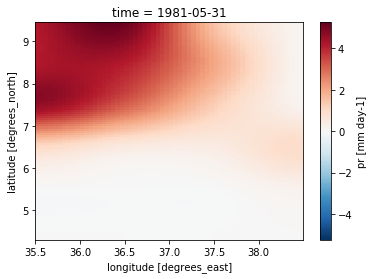

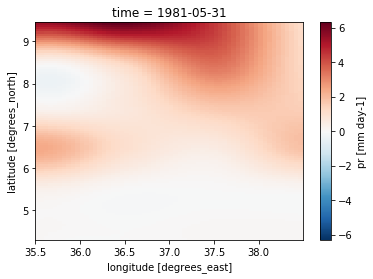

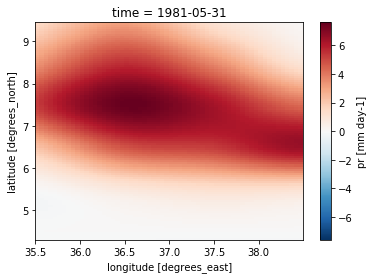

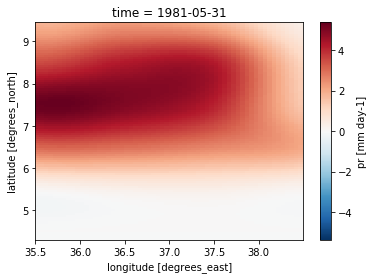

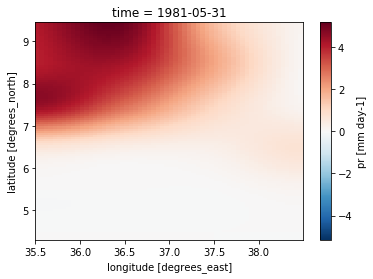

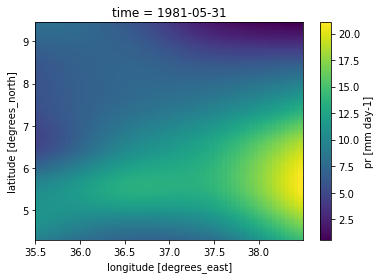

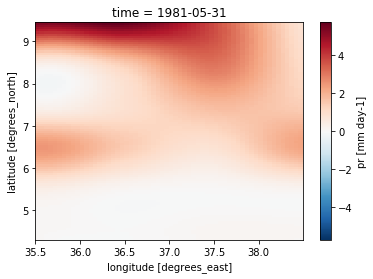

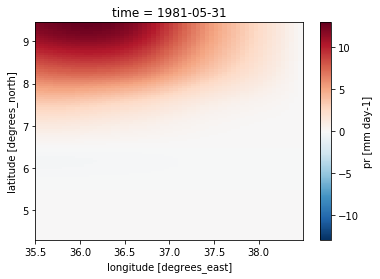

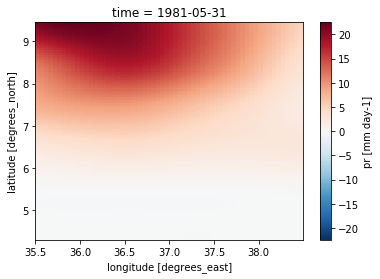

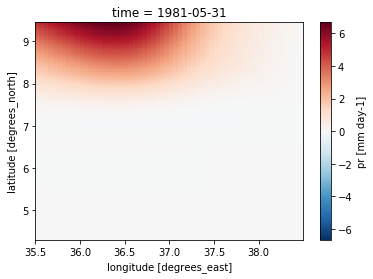

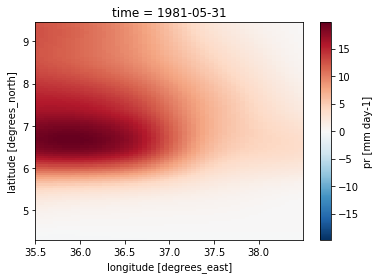

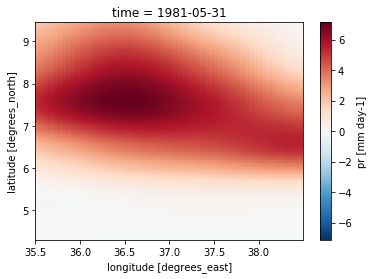

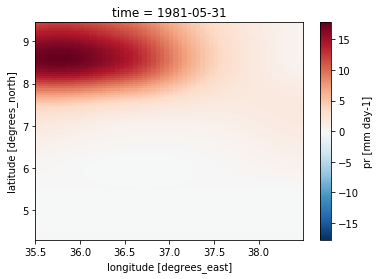

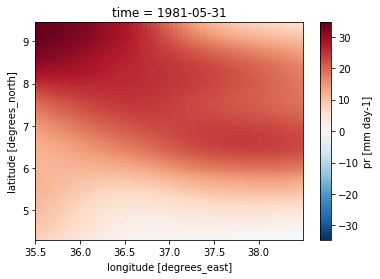

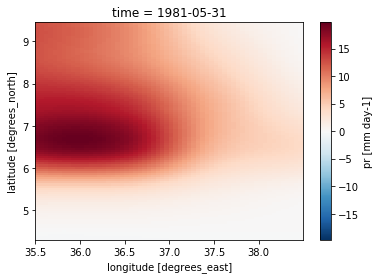

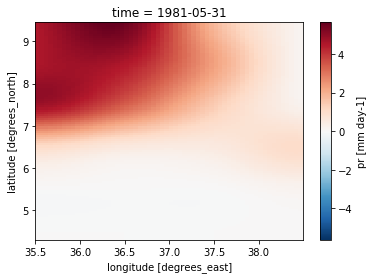

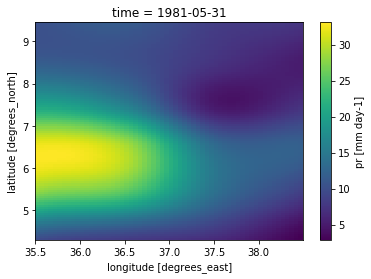

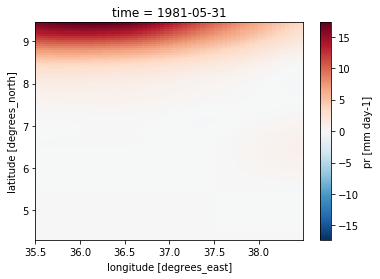

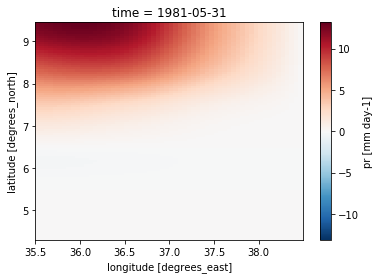

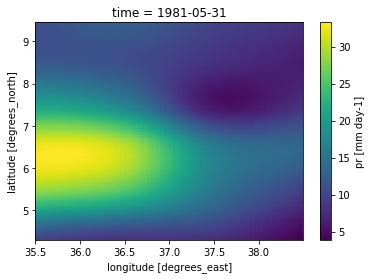

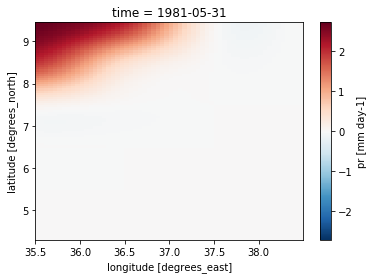

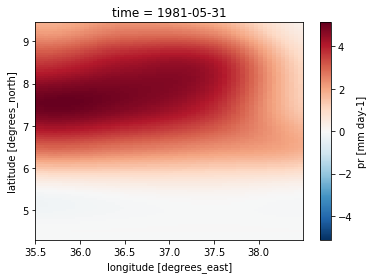

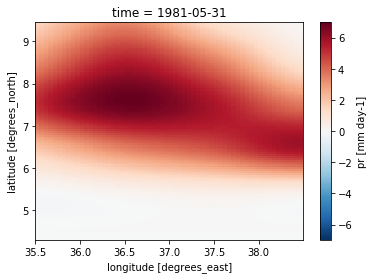

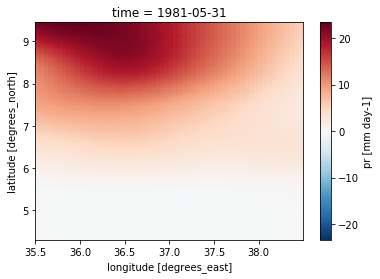

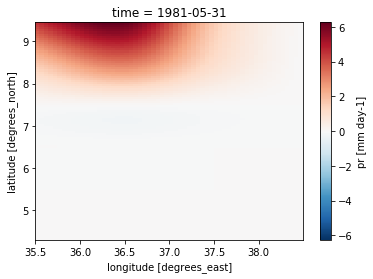

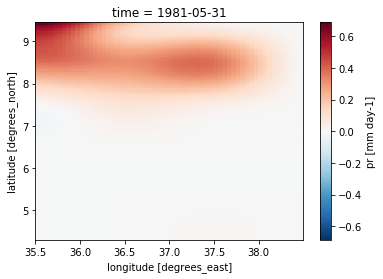

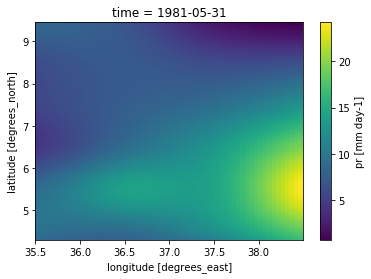

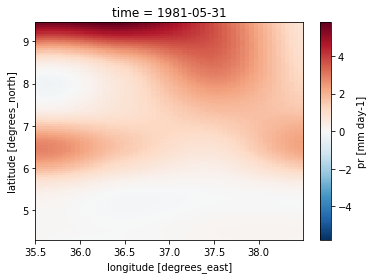

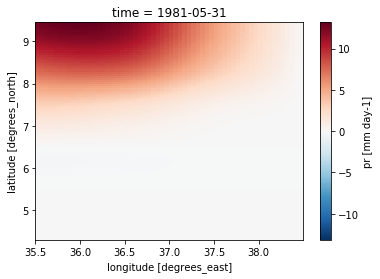

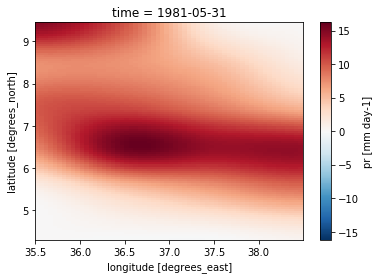

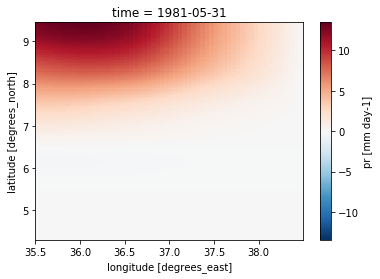

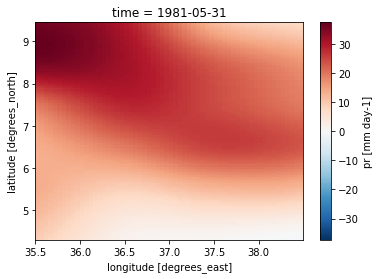

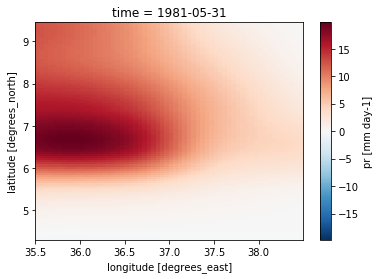

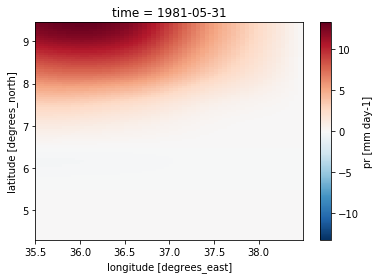

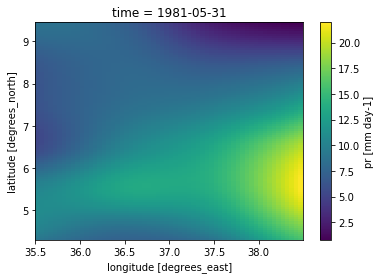

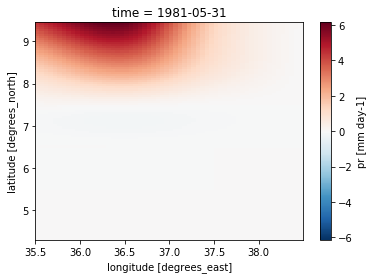

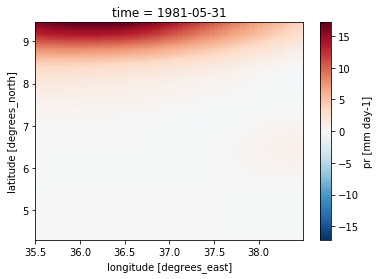

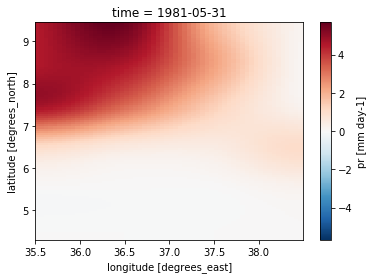

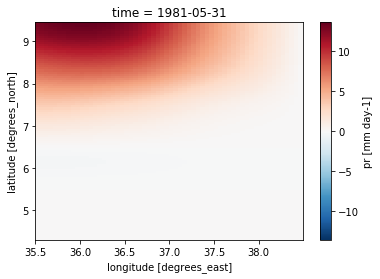

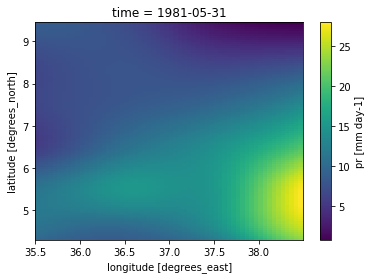

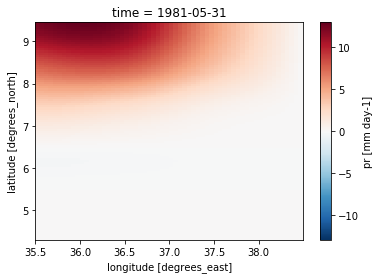

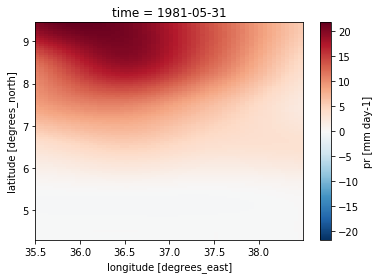

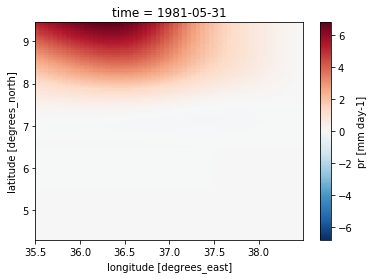

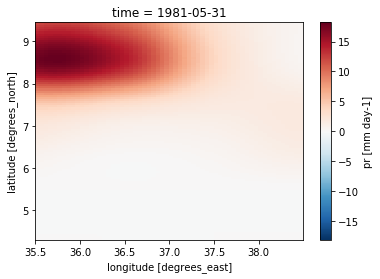

In [11]:
for f in files:  
    print(f)
    fpath_cmip6 = f
    ds = xr.open_dataset(fpath_cmip6, decode_cf=False)
    vname = list(ds.data_vars.keys())[0] # variable name
    ds[vname].attrs.pop('missing_value')
    ds = xr.decode_cf(ds)
    plt.figure()
    ds[vname].isel(time=150).plot()
    plt.savefig('/scratch/smj5vup/CMIP6/omoCMIP/scripts/downscale/figs/' + os.path.basename(f)[:-2] + 'png')
   

In [ ]:
# da_ds = downscalers[vname].downscale(da)

In [ ]:
# # Add metadata and create dataset
# da_ds.attrs = da.attrs
# ds_out = da_ds.to_dataset(name=vname)
# ds_out.attrs = ds.attrs
# ds_out.attrs['comment'] = NC_COMMENT_ATTR

# subdir = os.path.split(os.path.split(fpath_cmip6)[0])[-1]
# fname = os.path.basename(fpath_cmip6)

In [7]:
def to_clim(da_prcp):
    da_mthly = da_prcp.resample(time ='MS').mean()
    da_clim =  da_mthly.groupby('time.month').mean(dim='time')
    return da_clim

In [ ]:
da_mod = da
da_mod.values[da_mod.values < 0] = 0
        
da_mod_clim = to_clim(da_mod.loc[downscalers[vname].base_start_year:downscalers[vname].base_end_year])
da_mod_anoms = da_mod.groupby('time.month') / da_mod_clim
da_mod_anoms = da_mod_anoms.loc[downscalers[vname].downscale_start_year:downscalers[vname].downscale_end_year]
da_obsc_anoms = downscalers[vname].da_obsc_anoms
da_obs_anoms =downscalers[vname].da_obs_anoms
da_obs_clim = downscalers[vname].da_obs_clim
        
# DataArray to store downscaled results
da_mod_anoms_d = da_mod_anoms.copy()

a_date = da_mod_anoms.time.topandas().index[0]
print(a_date)

In [1]:
vals_mod = da_mod_anoms.loc[a_date]
print(vals_mod.time)
analog_pool = da_obsc_anoms[self.win_masks91.loc[a_date.strftime('%m-%d')].values]
print("vals_mod", vals_mod)
print("analog_pool", analog_pool)
print(vals_mod - analog_pool)
rmse_analogs = np.sqrt((np.square(vals_mod - analog_pool)).mean(dim=('longitude', 'latitude')))
print("rmse_analogs", rmse_analogs)

NameError: name 'da_mod_anoms' is not defined

In [ ]:
vals_analog = analog_pool[int(rmse_analogs.argmin())]

s = vals_mod - vals_analog
vals_obs_anoms = da_obs_anoms.loc[vals_analog.time.values]
vals_d = vals_obs_anoms.copy()
mask_wet = vals_d.values > 0        
vals_d.values[mask_wet] = vals_d.values[mask_wet] + s.values[mask_wet]

mask_wet_invalid = np.logical_and(mask_wet, vals_d.values <= 0)        
vals_d.values[mask_wet_invalid] = vals_obs_anoms.values[mask_wet_invalid]

da_mod_anoms_d.loc[a_date] = vals_d.values